# PDS: Assignment 1

### Deadline: April 18 (until 23:59)


**Instructions:** All answers should be filled in the notebook and then submitted to Moodle. For theoretical question you can use markdown and LaTeX. Name of notebook should be in following format:
 - Name_group_Assignment_1.ipynb (ex. Bill_Gates_1905_Assignment_1.ipynb)
 - Try to use fewer cells for compilation (for example, you can use print for several answers, instead of printing each answer on a separate cell)
 - **PLEASE:** submit only one jupyter notebook (no zip or csv files) and with your names as in the instruction. Ohterwise, there will be punishment for 50%.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.dates as mdates

## Q1 (20%)
Prove the Bias-Variance tradeoff decomposition, where MSE can be written as a sum of Variance of the estimator, Bias (squared) of the estimator and an irreducible error. 

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://downloader.disk.yandex.ru/preview/b4c8d9cd1f59429144543e0a3e3d143c886d2de093467e869c1ebb2b0ab136bf/607ddf8b/2u8zNLgnkNZKqQ4cQSjQnXmb4e5YDU5VrW38ys_lYYdU0S7ZWzh4CndMjMEpA4CYlK89wB4AVopn39BaXffT8Q%3D%3D?uid=0&filename=IMG_2618.JPG&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&owner_uid=0&tknv=v2&size=2048x2048')

## Q2 (30%)
- read netflix data: 0%
- find ratios of Movies and TV Shows for different countries: 10%
- plot histogram of average duration length for movies with following genres: "dramas", "comedies", "sports movies" (for this case use only first genre): 10%
- create pivot table with count of word "love" in description for different genres (for this case use only first genre): 10%

In [3]:
# read netflix data: 0%
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
#find ratios of Movies and TV Shows for different countries: 10%
movie = df[df['type'] == 'Movie']
movie['country'] = movie['country'].str.split(',\s*')
movie = movie.explode('country')
movie = movie[['type', 'country']].groupby('country', as_index = False).count()
movie.drop([0], inplace = True)
movie = movie.reset_index()
del movie['index']

tv = df[df['type'] == 'TV Show']
tv['country'] = tv['country'].str.split(',\s*')
tv = tv.explode('country')
tv = tv[['type', 'country']].groupby('country', as_index = False).count()

df = movie.merge(tv, how='left', on = 'country')
df.fillna(0, inplace = True)
df.rename(columns = {'type_x' : 'movie', 'type_y' : 'tv_shows'}, inplace = True)
df['tv_shows'] = df.tv_shows.astype('int64')
df['ratio'] = round(df['movie']/df['tv_shows'], 1) 
df['ratio'] = '1 : ' + df['ratio'].astype(str)
df = df[['country', 'tv_shows', 'movie', 'ratio']]
df.loc[df.ratio.str.contains('inf'), 'ratio'] = '1 : 0'
df.head()

<ipython-input-4-e918c243add2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['country'] = movie['country'].str.split(',\s*')
<ipython-input-4-e918c243add2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['country'] = tv['country'].str.split(',\s*')


,country,tv_shows,movie,ratio
0,Afghanistan,0,1,1 : 0
1,Albania,0,1,1 : 0
2,Algeria,0,2,1 : 0
3,Angola,0,1,1 : 0
4,Argentina,18,64,1 : 3.6


<AxesSubplot:xlabel='listed_in', ylabel='duration'>

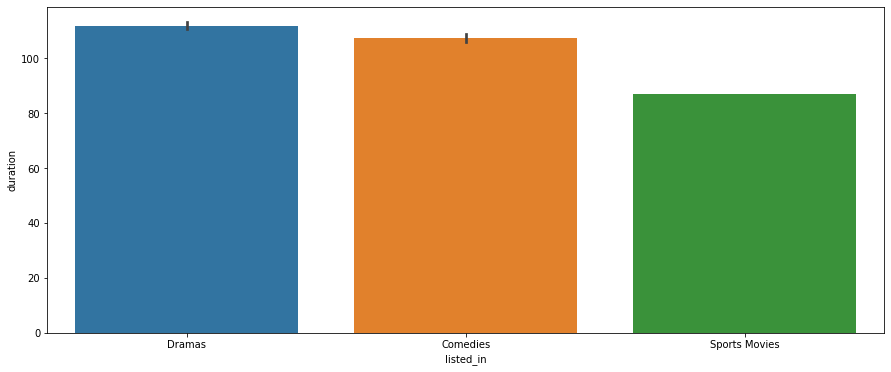

In [5]:
#plot histogram of average duration length for movies with following genres: "dramas", "comedies", "sports movies" (for this case use only first genre): 10%
plt.figure(figsize=(15, 6))
df = pd.read_csv('netflix_titles.csv')

df['listed_in'] = df['listed_in'].str.split(',').str[0]
df = df[(df['listed_in'] == 'Dramas') | (df['listed_in'] == 'Comedies') | (df['listed_in'] == 'Sports Movies')]
df['duration'] = df['duration'].str.replace(r' min', '').astype(int)
sns.barplot(x = 'listed_in', y = 'duration', data = df)

In [6]:
# create pivot table with count of word "love" in description for different genres (for this case use only first genre): 10%
df = pd.read_csv('netflix_titles.csv')
df['listed_in'] = df['listed_in'].str.split(',').str[0]
df = df[(df['description'].str.contains(' love ')) | (df['description'].str.contains(' love.'))] # looking for the word 'love'
df = df[['listed_in', 'description']].groupby('listed_in', as_index = False).count()
pd.pivot_table(df, index = 'listed_in', values = 'description').sort_values(by = 'description', ascending = False)

,description
listed_in,
Dramas,156
International TV Shows,120
Comedies,111
Action & Adventure,37
Children & Family Movies,16
Stand-Up Comedy,15
Crime TV Shows,14
International Movies,11
Kids' TV,8


## Q3 (20%)
Read "tidy_data.xlsx" and make it in Tidy Data Format. Plot scatterplots for each persons test results. 

_There should be 6 different scatterplots for each person_

_In every scatterplot there should be 25 different colors in scatterplot for each test_

In [7]:
df = pd.read_excel('tidy_data.xlsx')
df = pd.melt(df, id_vars = ['date' ,'Name', 'Sex'], var_name= 'Test', value_name= 'Score')
df.head()

,date,Name,Sex,Test,Score
0,2020-05-29,Joey,M,test1,5
1,2021-04-07,Chandler,M,test1,0
2,2021-05-06,Rachel,F,test1,6
3,2020-10-10,Joey,M,test1,9
4,2020-08-27,Ross,M,test1,6


<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

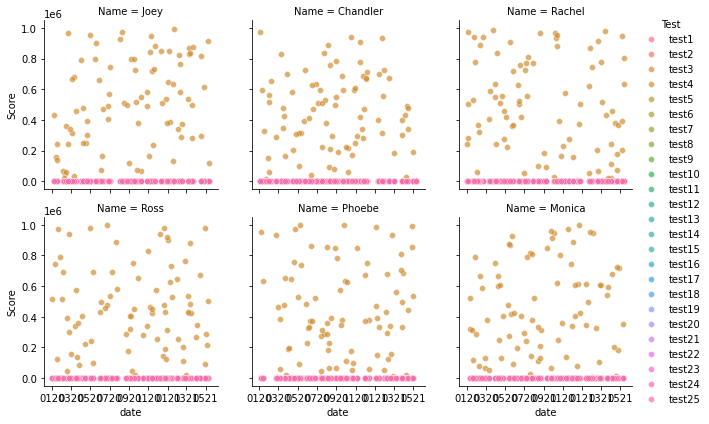

In [8]:
plt.figure(figsize=(15, 6))

plot = sns.FacetGrid(df, col = 'Name', hue = 'Test', col_wrap = 3)
plt.figure(figsize=(15, 6))
plot.map(sns.scatterplot, 'date', 'Score', alpha = 0.7)
xformatter = mdates.DateFormatter('%m%y')
plot.axes[0].xaxis.set_major_formatter(xformatter)
plot.add_legend()



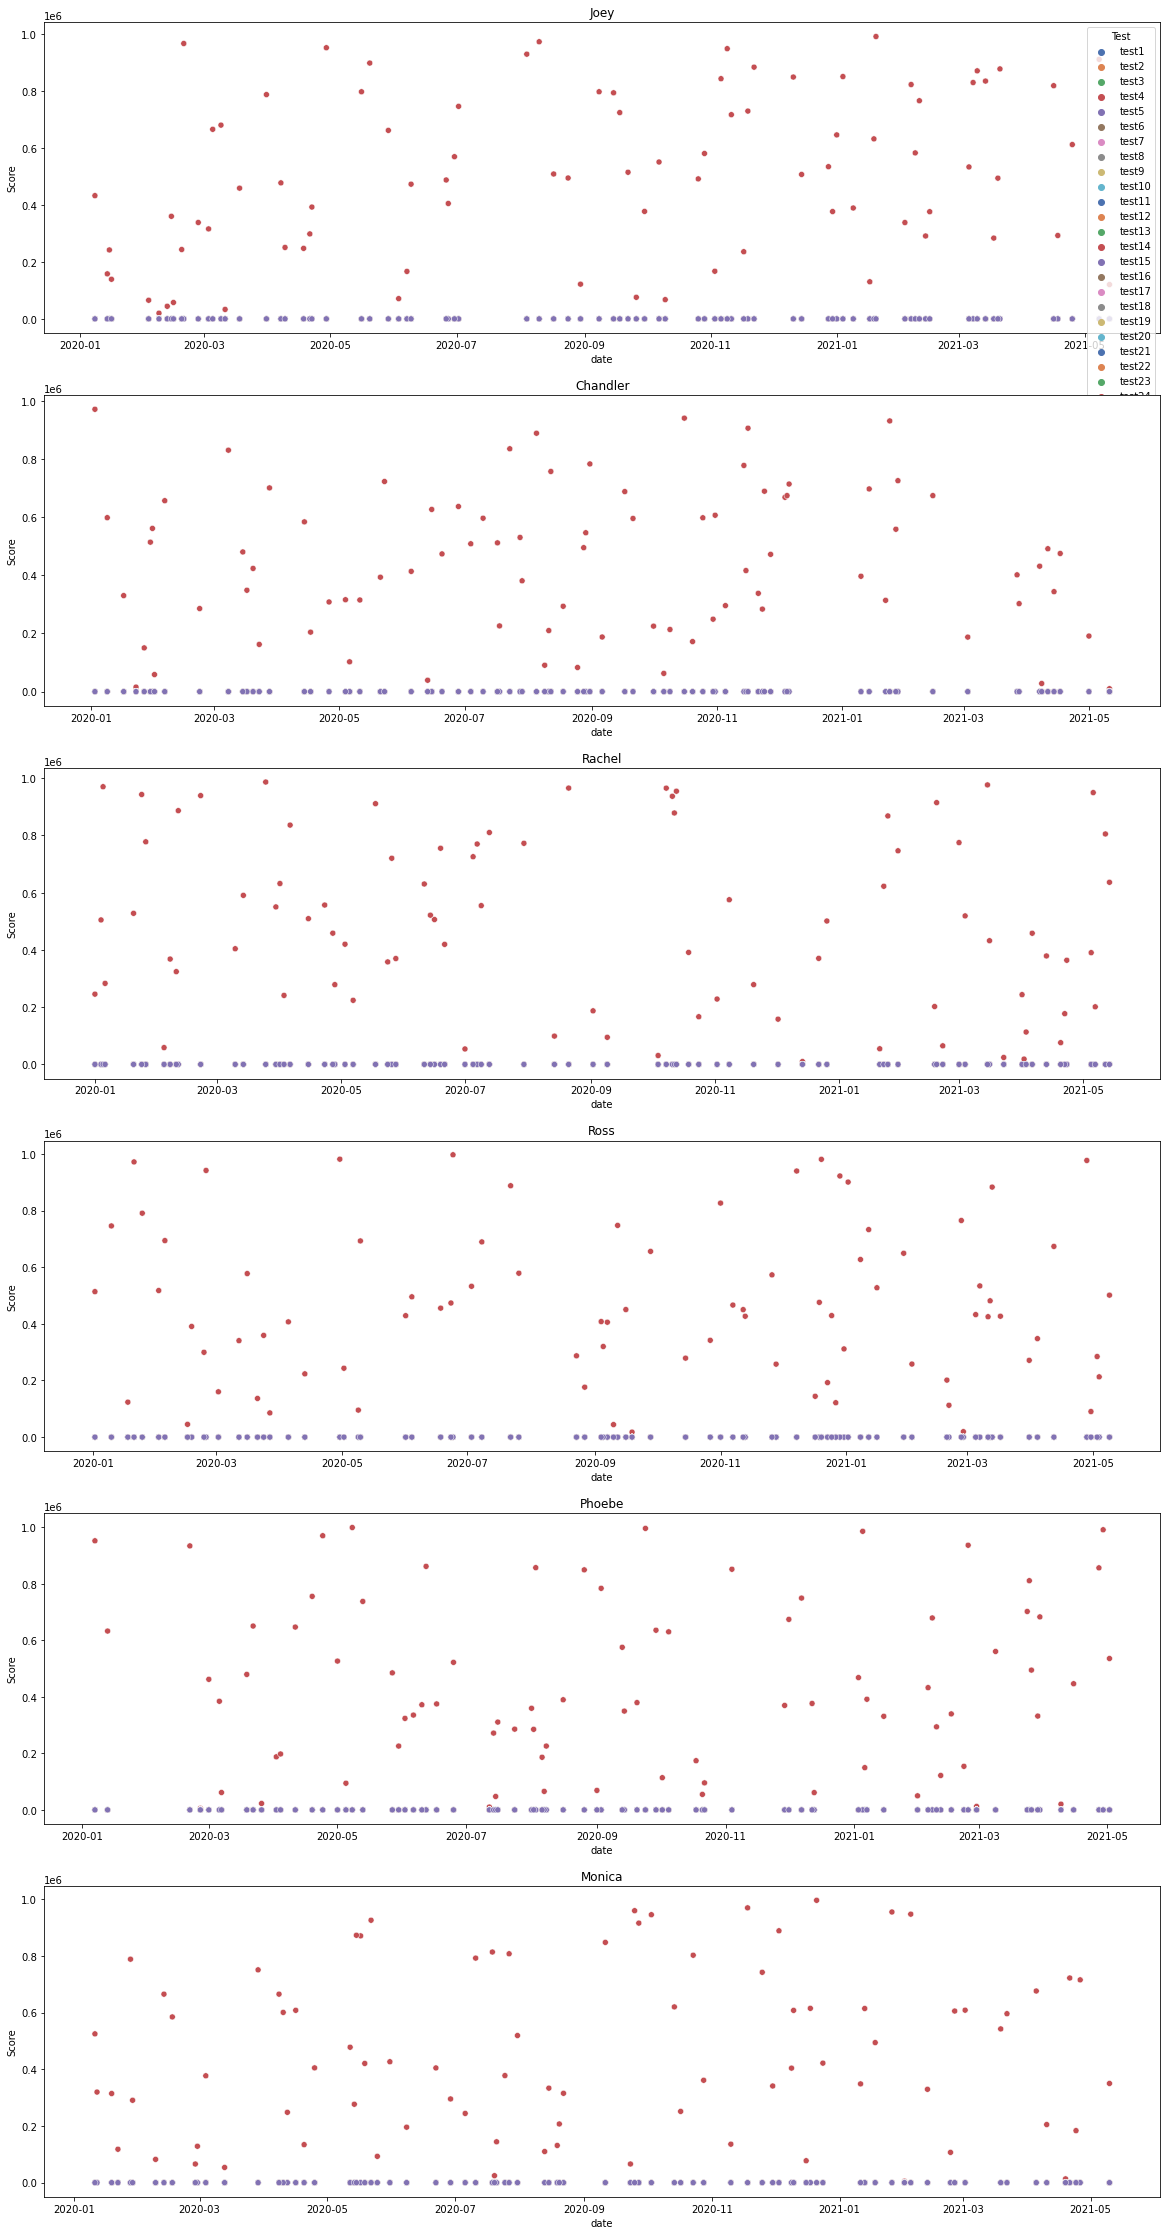

In [9]:
df["Name"].unique()
df_names = []
for name in df["Name"].unique():
    df_names.append(df[df["Name"] == name])

plt.figure(figsize=(20, 40))

for i in range(6):
    plt.subplot(6, 1, i+1)
    if i == 0:
        sns.scatterplot(x = df_names[i]["date"], y = df_names[i]["Score"], hue = df_names[i]["Test"], palette = "deep")
        plt.title(df_names[i]["Name"].iloc[i])
    else:
        sns.scatterplot(x = df_names[i]["date"], y = df_names[i]["Score"], hue = df_names[i]["Test"], palette = "deep").legend_.remove()
        plt.title(df_names[i]["Name"].iloc[i])

## Q4 (30%)
- read "knn_bias_variance_tradeoff.csv" file: 0%
- split your data into train and test samples with test_size = 0.3: 5%
- create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- normalize (use algorithm of your choice) your entire data, and then split your data into train and test samples with test_size = 0.3: 5%
- based on normalized data create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
- try to use auc metrics instead of accuracy, and then create bias variance tradeoff plot: 5%
- make conclusions of your findings (which data outputs clear bias variance tradeoff plot, which accuracy outputs clear bias variance tradeoff plot, etc.): 5%

In [10]:
# read "knn_bias_variance_tradeoff.csv" file: 0%
df = pd.read_csv('knn_bias_variance_tradeoff.csv')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [11]:
# split your data into train and test samples with test_size = 0.3: 5%
X = df.drop(['TARGET CLASS'], axis = 1)
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

TypeError: '(slice(None, None, None), 0)' is an invalid key

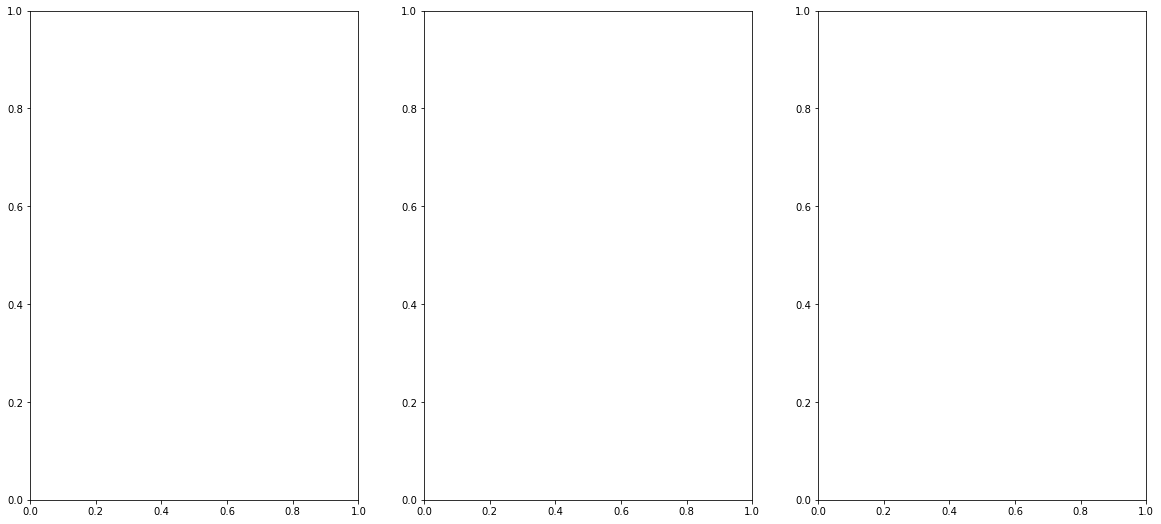

In [12]:
# create bias variance tradeoff plot of accuracy of your KNN model for train and test: 5%
fig, axes = plt.subplots(1, 3, figsize = (20, 9))

for k, ax in zip([1, 5, 25], axes):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill = True, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title('K = {}'.format(k))
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')

axes[0].legend(loc = 3)